In [19]:
import pandas as pd

col_name = [
    'Price', 'Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage', 'Condition'
]
data = pd.read_csv("realest.csv", names=col_name, header=0)

In [20]:
min_max = data.agg(['min', 'max'])
min_max

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
min,32.0,1.0,539.0,4.0,24.0,418.0,1.0,0.0,0.0
max,90.0,8.0,2295.0,12.0,50.0,2752.0,3.0,2.0,1.0


In [21]:
data["Price"] = data["Price"].apply(lambda x: (x - min_max["Price"]["min"]) / (min_max["Price"]["max"] - min_max["Price"]["min"]))
data["Bedroom"] = data["Bedroom"].apply(lambda x: (x - min_max["Bedroom"]["min"]) / (min_max["Bedroom"]["max"] - min_max["Bedroom"]["min"]))
data["Space"] = data["Space"].apply(lambda x: (x - min_max["Space"]["min"]) / (min_max["Space"]["max"] - min_max["Space"]["min"]))
data["Room"] = data["Room"].apply(lambda x: (x - min_max["Room"]["min"]) / (min_max["Room"]["max"] - min_max["Room"]["min"]))
data["Lot"] = data["Lot"].apply(lambda x: (x - min_max["Lot"]["min"]) / (min_max["Lot"]["max"] - min_max["Lot"]["min"]))
data["Tax"] = data["Tax"].apply(lambda x: (x - min_max["Tax"]["min"]) / (min_max["Tax"]["max"] - min_max["Tax"]["min"]))

data.agg(['min', 'max'])

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
min,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0


single variable linear regression

In [22]:
space_price = data[["Space", "Price"]].dropna().to_numpy()
space_price

array([[0.24373576, 0.36206897],
       [0.1571754 , 0.39655172],
       [0.20558087, 0.4137931 ],
       [0.26651481, 0.44827586],
       [0.31947608, 0.55172414],
       [0.20387244, 0.20689655],
       [0.49031891, 0.29310345],
       [0.98063781, 0.65517241],
       [0.42767654, 0.68965517],
       [0.89123007, 0.86206897],
       [0.96867882, 0.9137931 ],
       [0.05808656, 0.22413793],
       [0.18394077, 0.25862069],
       [0.28701595, 0.29310345],
       [0.4476082 , 0.4137931 ],
       [0.13838269, 0.48275862],
       [0.33428246, 0.51724138],
       [0.39123007, 0.55172414],
       [0.22209567, 0.5862069 ],
       [0.3405467 , 0.05172414],
       [0.11617312, 0.10344828],
       [0.03246014, 0.18965517],
       [0.15034169, 0.24137931],
       [0.08940774, 0.24137931],
       [0.08656036, 0.31034483],
       [0.27562642, 0.56896552],
       [0.24202733, 0.37931034],
       [0.14806378, 0.44827586],
       [0.23006834, 0.44827586],
       [0.28587699, 0.5       ],
       [0.

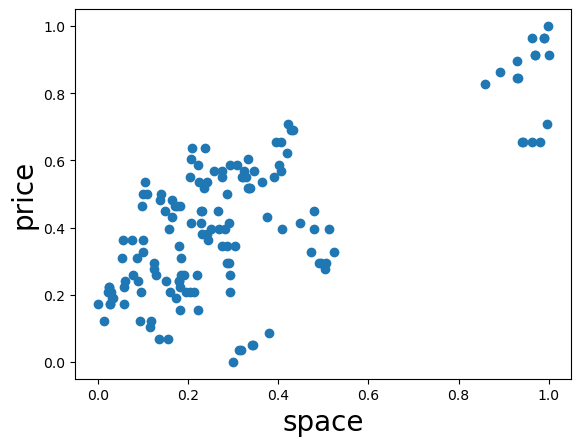

In [23]:
import matplotlib.pyplot as plt

xpoints = space_price[:, :-1]
ypoints = space_price[:, -1:]
plt.xlabel('space', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.plot(xpoints, ypoints, 'o')
plt.show()

In [24]:
import gd

w, b = gd.extract_params(space_price)
w, b

(array([0.61632234]), 0.2243881866925164)

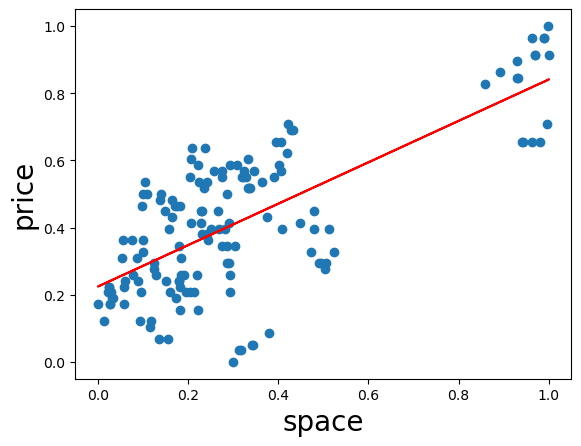

In [25]:
xpoints = space_price[:, :-1]
ypoints = space_price[:, -1:]
plt.xlabel('space', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.plot(xpoints, ypoints, 'o')
plt.plot(xpoints, w[0] * xpoints + b, 'r')
plt.show()

multiple variables linear regression

In [26]:
all_params_data = data[['Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage', 'Condition', 'Price']].dropna().to_numpy()

In [27]:
import gd
import numpy as np

w, b = gd.extract_params(all_params_data)
print(w, b)

params = all_params_data[:, :-1]
predicted_values = gd.predicted_value(w, b, params) * (min_max["Price"]["max"] - min_max["Price"]["min"]) + min_max["Price"]["min"]
actual_value = all_params_data[:, -1:] * (min_max["Price"]["max"] - min_max["Price"]["min"]) + min_max["Price"]["min"]
np.hstack((predicted_values, actual_value))

[-0.36559199  0.30196232  0.20584798  0.10778504  0.17182588  0.11124552
  0.07164928  0.03228587] 0.009156647616412824


array([[53.26479986, 53.        ],
       [58.74983215, 55.        ],
       [53.80737622, 56.        ],
       [58.16382113, 58.        ],
       [65.33391004, 64.        ],
       [54.82374702, 44.        ],
       [76.05944911, 70.        ],
       [78.88520131, 82.        ],
       [81.207409  , 85.        ],
       [44.30917952, 45.        ],
       [43.86640511, 47.        ],
       [48.88770033, 49.        ],
       [60.61044919, 56.        ],
       [45.60445411, 60.        ],
       [58.09106163, 62.        ],
       [54.65307167, 66.        ],
       [48.13197396, 35.        ],
       [42.20557827, 38.        ],
       [47.91117661, 46.        ],
       [53.38210148, 46.        ],
       [56.3584447 , 50.        ],
       [60.05564872, 65.        ],
       [56.13170321, 54.        ],
       [61.72619072, 58.        ],
       [57.29532516, 58.        ],
       [58.51146664, 61.        ],
       [65.70137521, 62.        ],
       [57.38280387, 46.        ],
       [75.86555123,